In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
ls

 Il volume nell'unit… D Š Data
 Numero di serie del volume: 7009-8AD6

 Directory di D:\Developments\DSO_TELEDYNE

10/02/2023  20:29    <DIR>          .
10/02/2023  19:56    <DIR>          ..
10/02/2023  19:56    <DIR>          .ipynb_checkpoints
10/02/2023  20:29           237.358 BGO.ipynb
10/02/2023  18:04    <DIR>          bin
10/02/2023  13:04           186.472 CsI.ipynb
10/02/2023  19:53    <DIR>          data
22/12/2022  15:31    <DIR>          temp
               2 File        423.830 byte
               6 Directory  1.992.962.703.360 byte disponibili


## dark

In [9]:
df = pd.read_csv('data/20230209/20230209_dark.txt', delimiter = " ", names=['frame', 'time1', 'ampl1'])#, 'time2', 'ampl2'])#, skiprows=150000 )

In [10]:
df

,frame,time1,ampl1
0,1.0,-7.000000e-07,0.0006
1,1.0,-6.995000e-07,0.0006
2,1.0,-6.990000e-07,0.0006
3,1.0,-6.985000e-07,0.0008
4,1.0,-6.980000e-07,0.0008
...,...,...,...
2589995,925.0,6.975000e-07,-0.0016
2589996,925.0,6.980000e-07,-0.0016
2589997,925.0,6.985000e-07,-0.0014
2589998,925.0,6.990000e-07,-0.0016


(-100.0, 500.0)

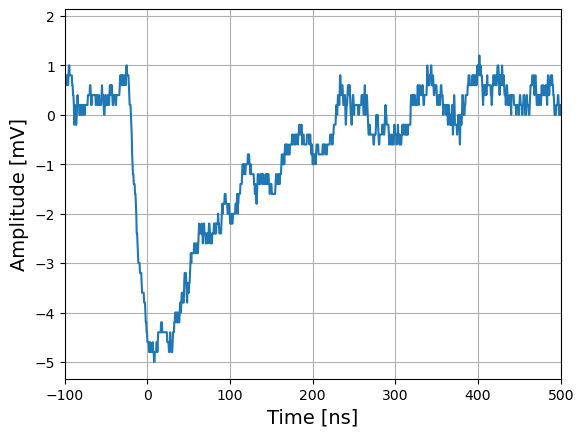

In [28]:
d=df.query('frame==14')
plt.plot(d.time1*1E9, d.ampl1*1000, label='BGO')
#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-1E2, 5E2)

(-100.0, 100.0)

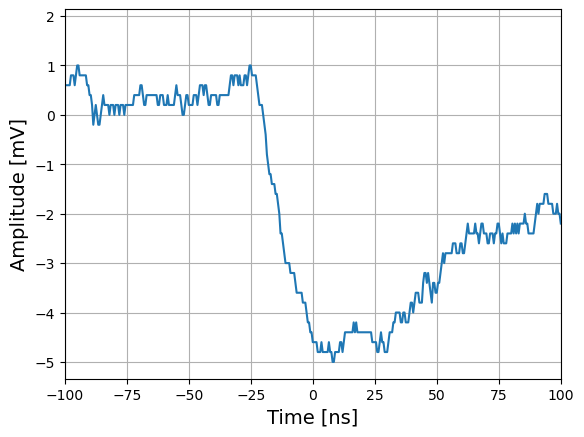

In [29]:
d=df.query('frame==14')
plt.plot(d.time1*1E9, d.ampl1*1000, label='BGO')
#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-1E2, 1E2)

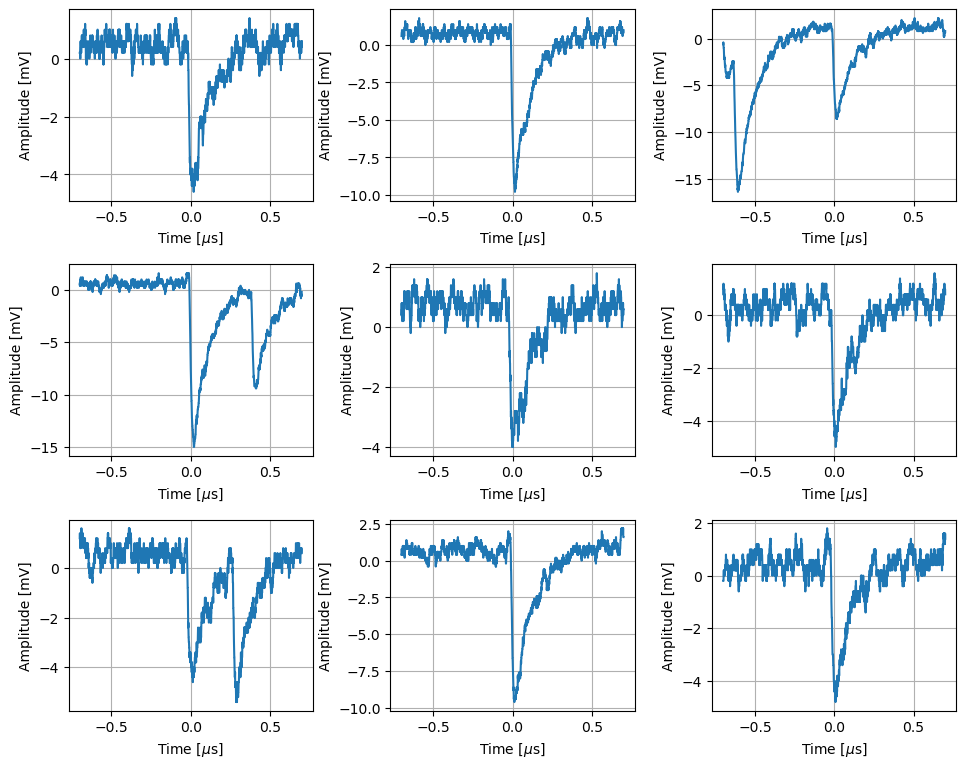

In [17]:
#%matplotlib widget
i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.time1*1E6, d.ampl1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [19]:
lista = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    lista+=[np.max(np.abs(d.ampl1))]
    
lista = np.array(lista)


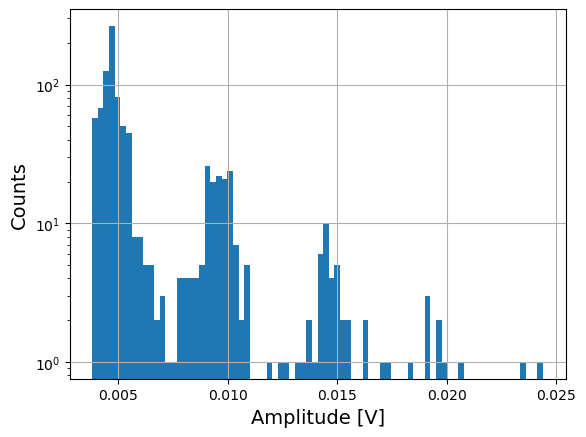

In [23]:
plt.hist(lista, bins=80)
plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.grid()
plt.show()

## csi

In [30]:
df = pd.read_csv('data/20230209/20230209_csi_thrext_150mV.txt', delimiter = " ", names=['frame', 'time1', 'ampl1', 'time2', 'ampl2'])#, skiprows=150000 )

In [31]:
df

,frame,time1,ampl1,time2,ampl2
0,2.0,-0.000001,-0.002,-0.000001,-0.002
1,2.0,-0.000001,0.000,-0.000001,-0.002
2,2.0,-0.000001,-0.002,-0.000001,-0.002
3,2.0,-0.000001,0.000,-0.000001,-0.002
4,2.0,-0.000001,0.000,-0.000001,0.002
...,...,...,...,...,...
18356795,6557.0,0.000001,-0.020,0.000001,0.006
18356796,6557.0,0.000001,-0.020,0.000001,0.010
18356797,6557.0,0.000001,-0.022,0.000001,0.010
18356798,6557.0,0.000001,-0.020,0.000001,0.006


(-100.0, 500.0)

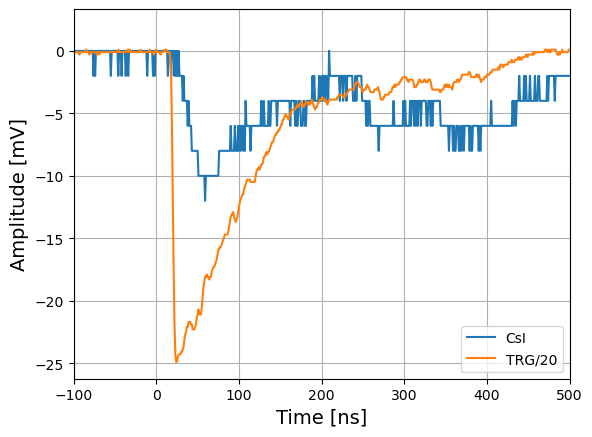

In [44]:
d=df.query('frame==14')
plt.plot(d.time1*1E9, d.ampl1*1000, label='CsI')
plt.plot(d.time2*1E9, d.ampl2*1000/20, label='TRG/20')
#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-1E2, 5E2)

(-100.0, 1000.0)

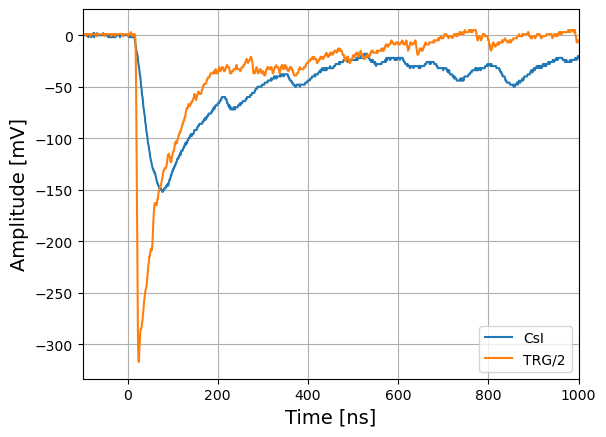

In [43]:
d=df.query('frame==5')
plt.plot(d.time1*1E9, d.ampl1*1000, label='CsI')
plt.plot(d.time2*1E9, d.ampl2*1000/2, label='TRG/2')
#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-1E2, 10E2)

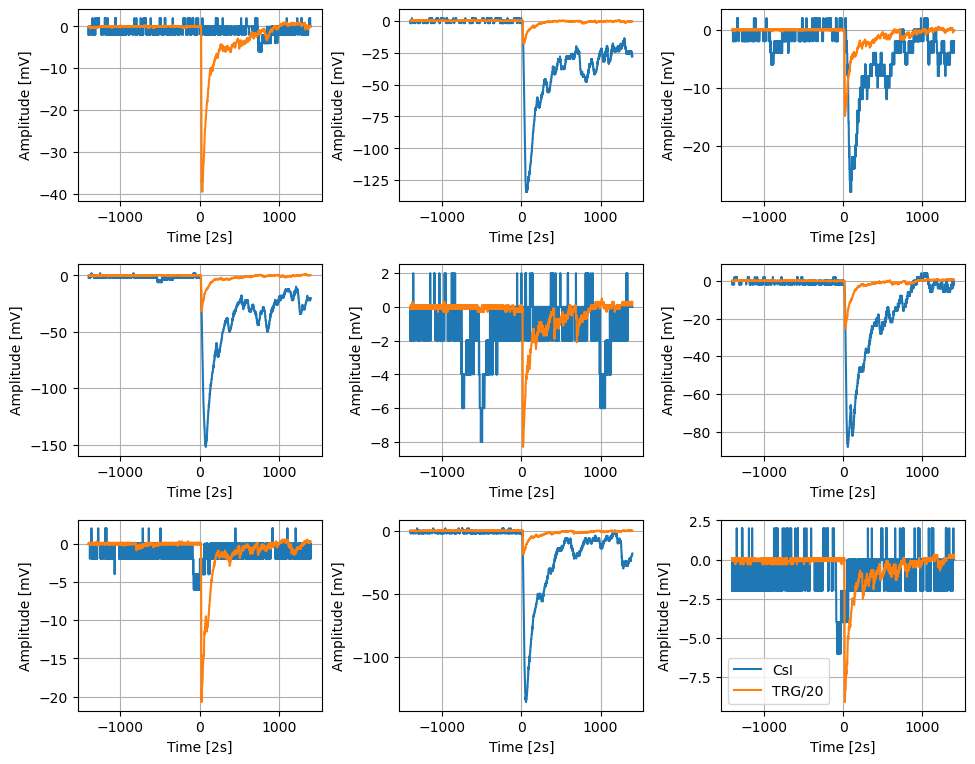

In [39]:
#%matplotlib widget
i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.time1*1E9, d.ampl1*1000, label='CsI')
    axs[i][j].plot(d.time2*1E9, d.ampl2*1000/20, label='TRG/20')
    axs[i][j].set_xlabel(r'Time [2s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.legend()
plt.show()


In [45]:
lista1 = []
lista2 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    lista1+=[np.max(np.abs(d.ampl1))]
    lista2+=[np.max(np.abs(d.ampl2))]
    
lista1 = np.array(lista1)
lista2 = np.array(lista2)


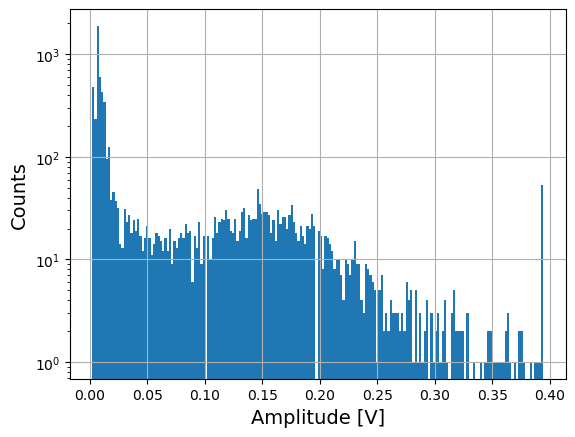

In [50]:
plt.hist(lista1, bins=200)
plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.grid()
plt.show()

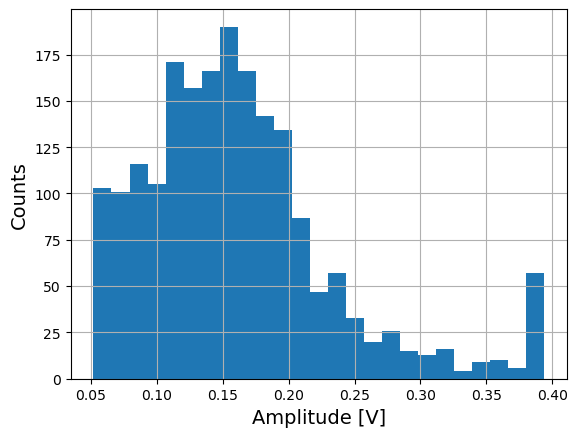

In [64]:
plt.hist(lista1[lista1>0.05], bins=25)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.grid()
plt.show()

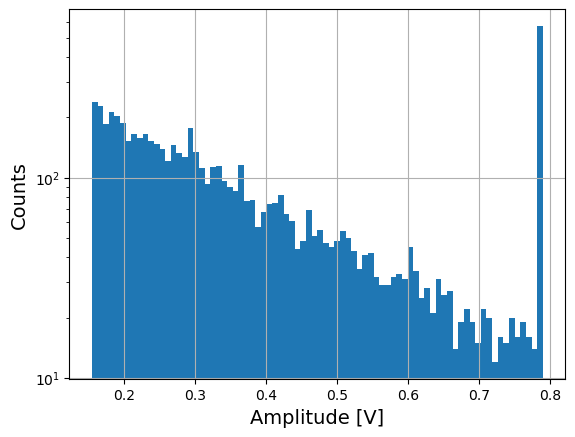

In [47]:
plt.hist(lista2, bins=80)
plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.grid()
plt.show()

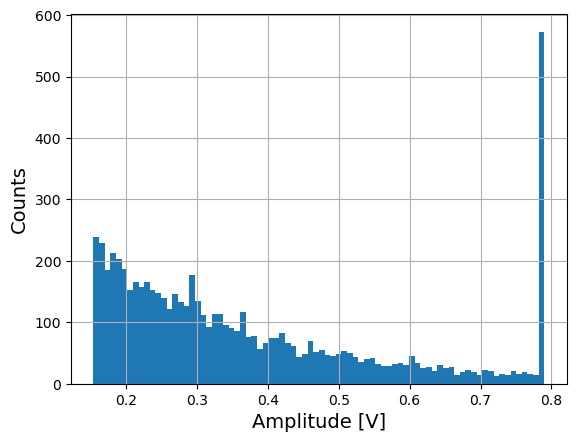

In [68]:
plt.hist(lista2, bins=80)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.grid()
plt.show()

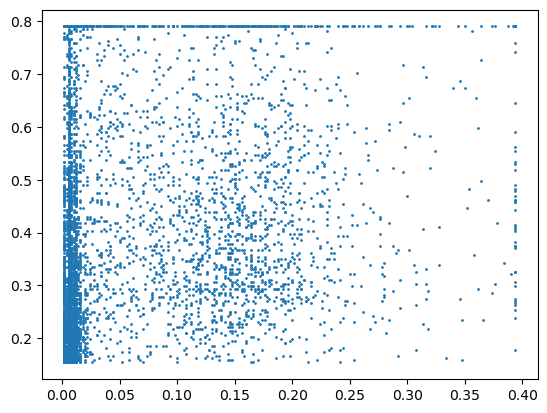

In [67]:
plt.scatter(lista1, lista2, s=1)

## csi triggered ext right

In [3]:
df = pd.read_csv('data/20230210/20230210_csi_thrext_150mV_destra.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

In [7]:
df[['frame', 't1', 'a1', 'a2']]

,frame,t1,a1,a2
0,1.0,-0.000001,0.0,-0.002
1,1.0,-0.000001,0.0,0.002
2,1.0,-0.000001,0.0,-0.002
3,1.0,-0.000001,0.0,-0.002
4,1.0,-0.000001,0.0,0.002
...,...,...,...,...
10522395,3758.0,0.000001,0.0,0.006
10522396,3758.0,0.000001,0.0,0.002
10522397,3758.0,0.000001,0.0,0.006
10522398,3758.0,0.000001,0.0,0.002


Text(0, 0.5, 'Amplitude [mV]')

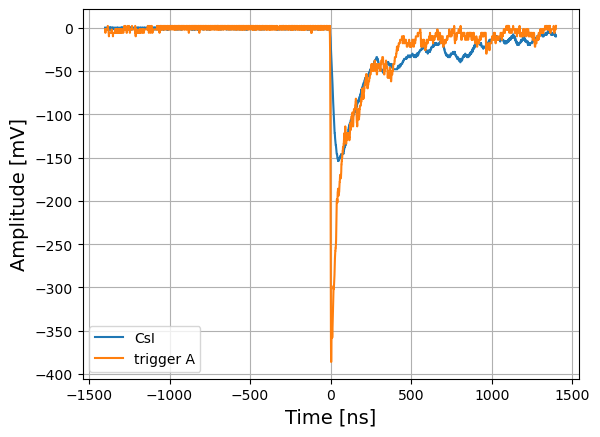

In [13]:
d=df.query('frame==16')
plt.plot(d.t1*1E9, d.a1*1000, label='CsI')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-1E2, 5E2)

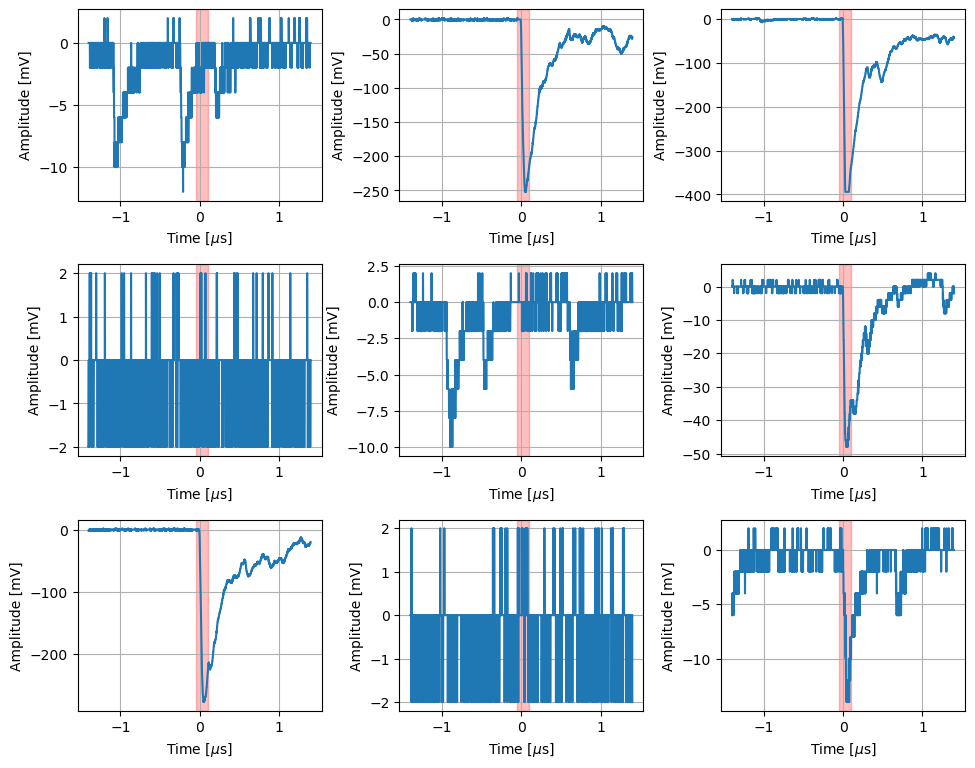

In [12]:
#%matplotlib widget
timerange=np.array([-50E-9, 100E-9])


i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [28]:
AMP = []
IND = []
timerange=np.array([-50E-9, 100E-9])
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)

C:\Users\Belle2\AppData\Local\Temp\ipykernel_17828\901430912.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


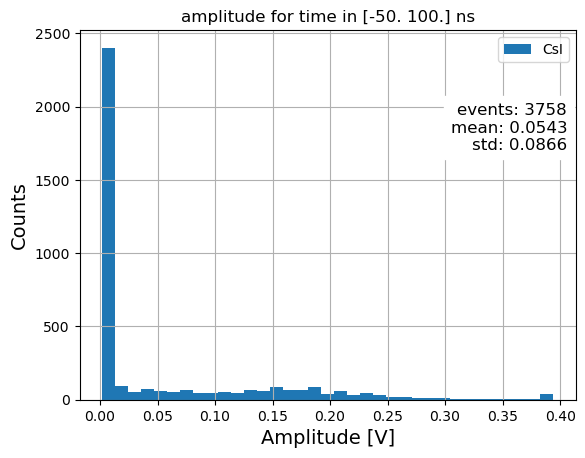

In [29]:
plt.hist(AMP, bins=35, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.show()

C:\Users\Belle2\AppData\Local\Temp\ipykernel_17828\360249793.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


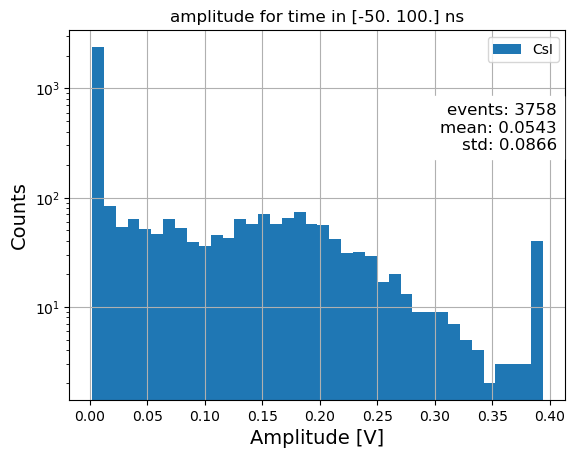

In [30]:
plt.hist(AMP, bins=38, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.yscale('log')
plt.show()

In [31]:
np.savetxt('data/CsI_elaborated_data/csi_right_trigger.txt', AMP)
#b = np.loadtxt('data/CsI_elaborated_data/csi_right_trigger.txt')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


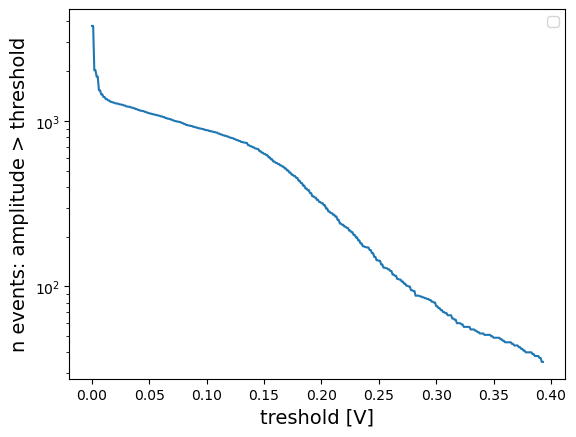

In [18]:
CUTS_IN = np.arange(0, np.max(AMP), 0.001)
COUNTS_IN = []
for cut in CUTS_IN:
    COUNTS_IN+=[len(AMP[AMP>cut])]

plt.plot(CUTS_IN, COUNTS_IN)
plt.yscale('log')
plt.xlabel('treshold [V]', size=14)
plt.ylabel('n events: amplitude > threshold', size=14)
plt.legend()

In [20]:
FRAMES

array([[3.000e+00],
       [4.000e+00],
       [8.000e+00],
       ...,
       [3.752e+03],
       [3.754e+03],
       [3.755e+03]])

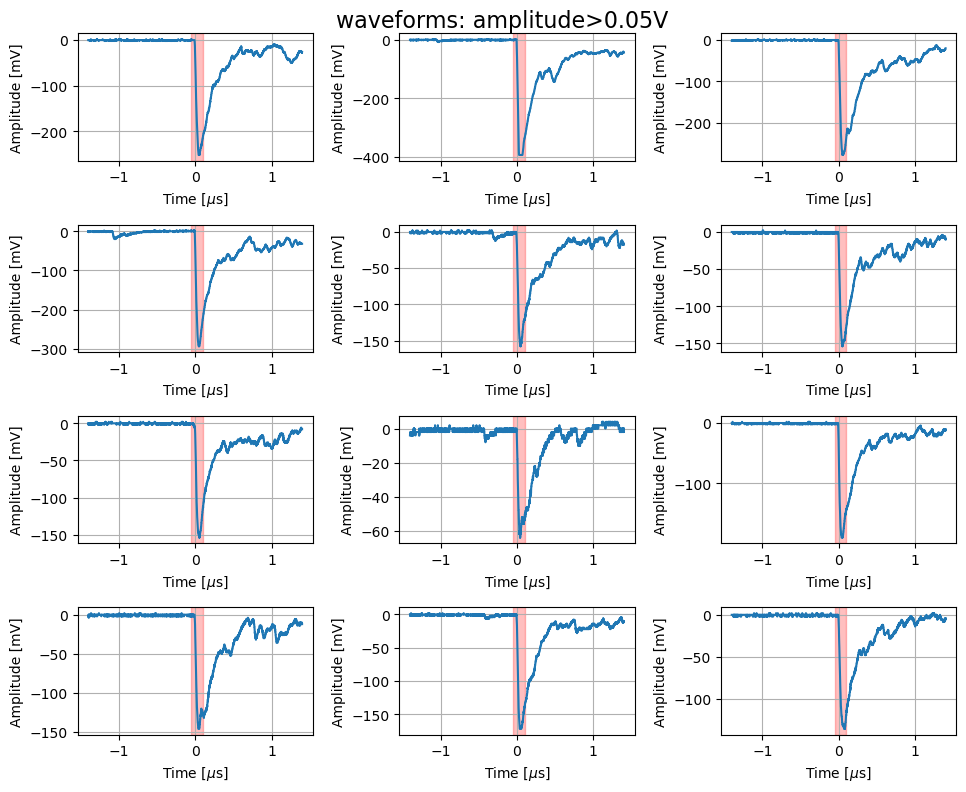

In [22]:
#%matplotlib widget
cut=0.05
i=0
j=0
plots_per_row=3
FRAMES=IND[AMP>cut]
FRAMES=FRAMES[:12]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='CsI')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [23]:
AMP = []
IND = []
timerange=np.array([-450E-9, -300E-9])
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)



C:\Users\Belle2\AppData\Local\Temp\ipykernel_17828\3723441510.py:7: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


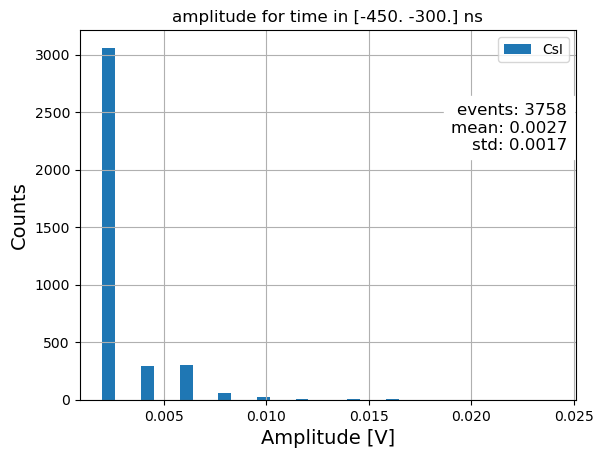

In [24]:
plt.hist(AMP, bins=35, label='CsI')

counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)

plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)

#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()

plt.show()

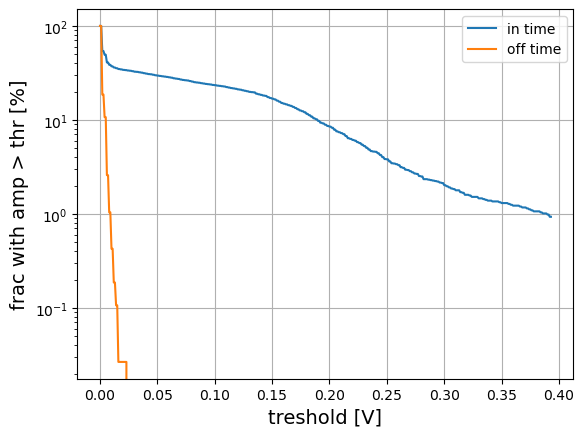

In [25]:
CUTS_OFF = np.arange(0, 0.05, 0.001)
COUNTS_OFF = []
for cut in CUTS_OFF:
    COUNTS_OFF+=[len(AMP[AMP>cut])]

plt.plot(CUTS_IN, np.array(COUNTS_IN)/COUNTS_IN[0]*100, label='in time')
plt.plot(CUTS_OFF, np.array(COUNTS_OFF)/COUNTS_IN[0]*100, label='off time')
plt.yscale('log')
plt.xlabel('treshold [V]', size=14)
plt.ylabel('frac with amp > thr [%]', size=14)
plt.legend()
plt.grid()

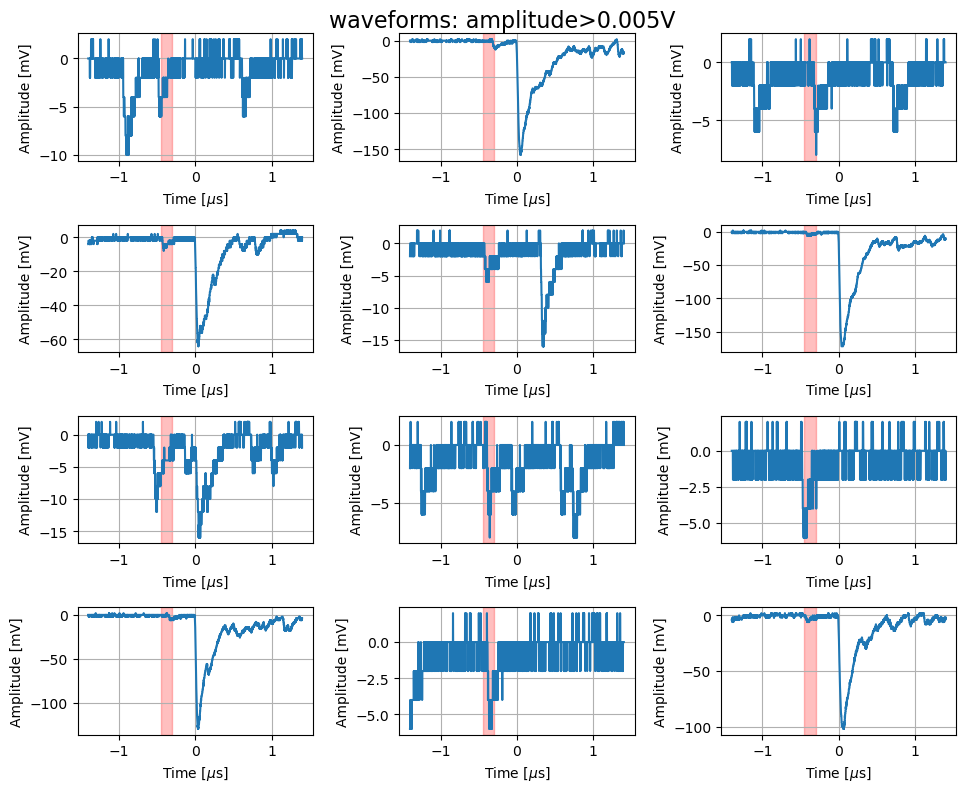

In [27]:
#%matplotlib widget
cut=0.005
i=0
j=0
plots_per_row=3
FRAMES=IND[AMP>cut]
FRAMES=FRAMES[:12]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


## csi triggered ext left

In [34]:
df = pd.read_csv('data/20230210/20230210_csi_thrext_150mV_sinistra.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

In [35]:
df[['frame', 't1', 'a1', 'a2']]

,frame,t1,a1,a2
0,1.0,-0.000001,-0.002,-0.002
1,1.0,-0.000001,-0.002,-0.002
2,1.0,-0.000001,-0.002,-0.002
3,1.0,-0.000001,-0.002,-0.002
4,1.0,-0.000001,-0.004,-0.002
...,...,...,...,...
5776395,2063.0,0.000001,-0.002,-0.002
5776396,2063.0,0.000001,0.000,-0.002
5776397,2063.0,0.000001,0.000,0.002
5776398,2063.0,0.000001,0.000,-0.002


Text(0, 0.5, 'Amplitude [mV]')

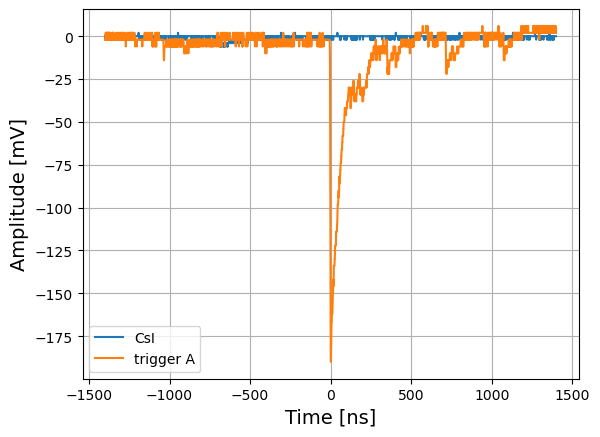

In [36]:
d=df.query('frame==16')
plt.plot(d.t1*1E9, d.a1*1000, label='CsI')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-1E2, 5E2)

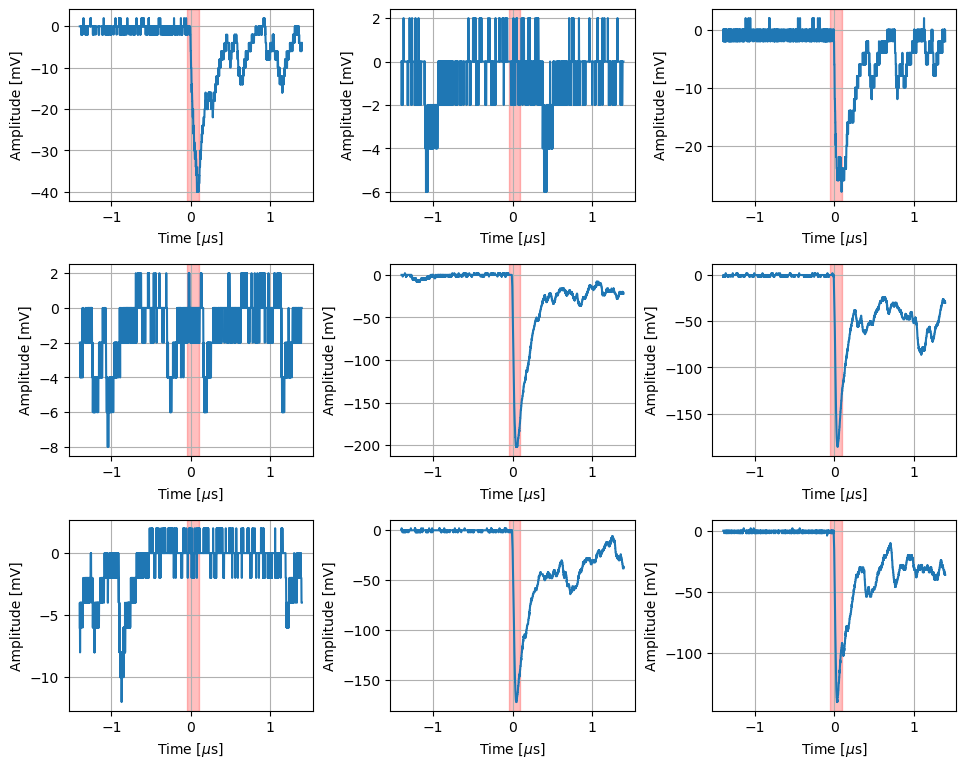

In [37]:
#%matplotlib widget
timerange=np.array([-50E-9, 100E-9])


i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [38]:
AMP = []
IND = []
timerange=np.array([-50E-9, 100E-9])
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)

C:\Users\Belle2\AppData\Local\Temp\ipykernel_17828\901430912.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


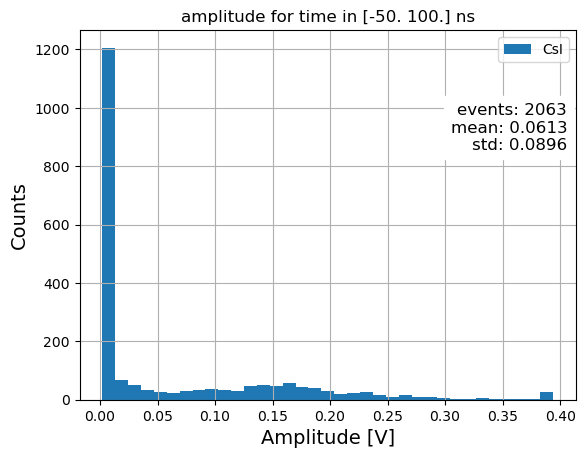

In [39]:
plt.hist(AMP, bins=35, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.show()

C:\Users\Belle2\AppData\Local\Temp\ipykernel_17828\360249793.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


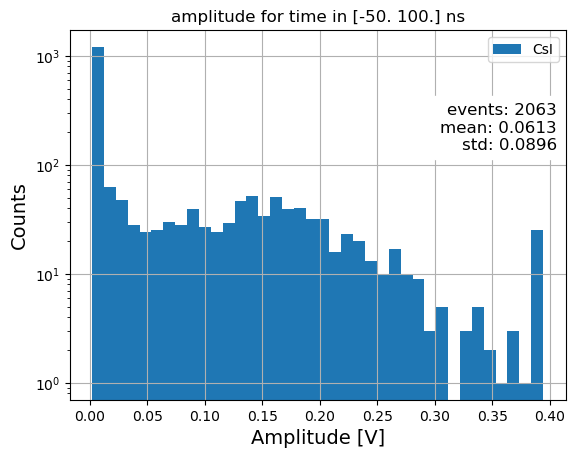

In [40]:
plt.hist(AMP, bins=38, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.yscale('log')
plt.show()

In [41]:
np.savetxt('data/CsI_elaborated_data/csi_left_trigger.txt', AMP)
#b = np.loadtxt('data/CsI_elaborated_data/csi_right_trigger.txt')

## csi triggered ext center

In [42]:
df = pd.read_csv('data/20230210/20230210_csi_thrext_150mV.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

In [43]:
df[['frame', 't1', 'a1', 'a2']]

,frame,t1,a1,a2
0,1.0,-0.000001,-0.004,-0.002
1,1.0,-0.000001,-0.006,0.002
2,1.0,-0.000001,-0.004,0.002
3,1.0,-0.000001,-0.006,0.002
4,1.0,-0.000001,-0.004,0.002
...,...,...,...,...
8632395,3083.0,0.000001,0.000,0.002
8632396,3083.0,0.000001,0.000,0.002
8632397,3083.0,0.000001,0.000,0.002
8632398,3083.0,0.000001,0.000,0.002


Text(0, 0.5, 'Amplitude [mV]')

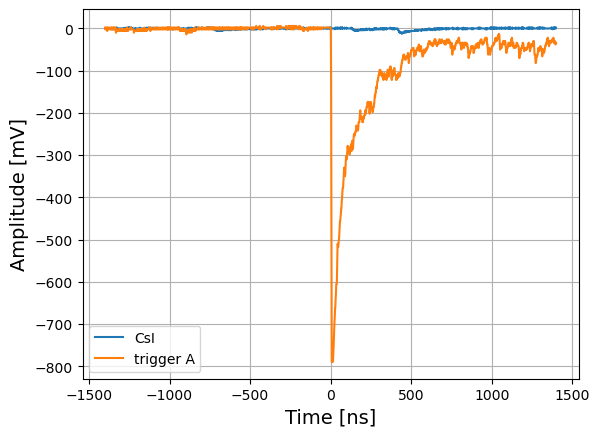

In [44]:
d=df.query('frame==16')
plt.plot(d.t1*1E9, d.a1*1000, label='CsI')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-1E2, 5E2)

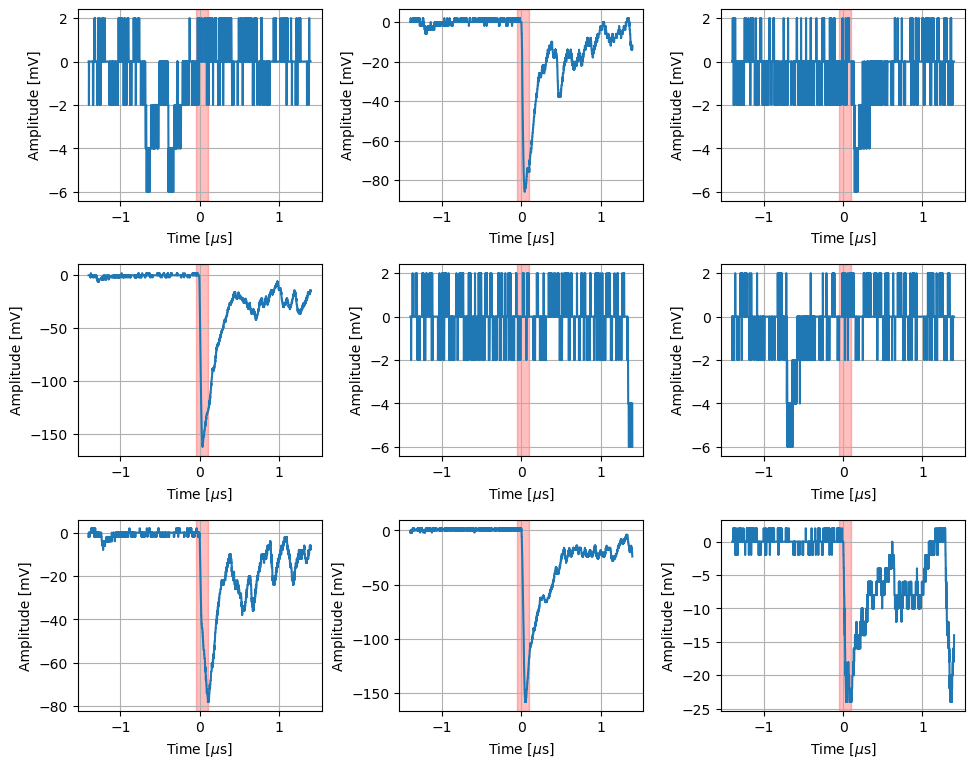

In [45]:
#%matplotlib widget
timerange=np.array([-50E-9, 100E-9])


i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [46]:
AMP = []
IND = []
timerange=np.array([-50E-9, 100E-9])
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)

C:\Users\Belle2\AppData\Local\Temp\ipykernel_17828\901430912.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


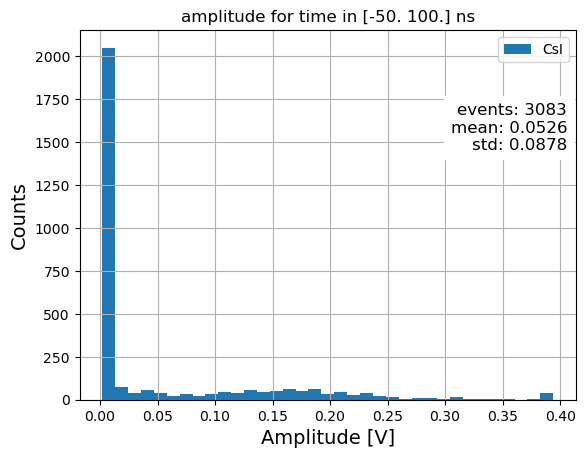

In [47]:
plt.hist(AMP, bins=35, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.show()

C:\Users\Belle2\AppData\Local\Temp\ipykernel_17828\360249793.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


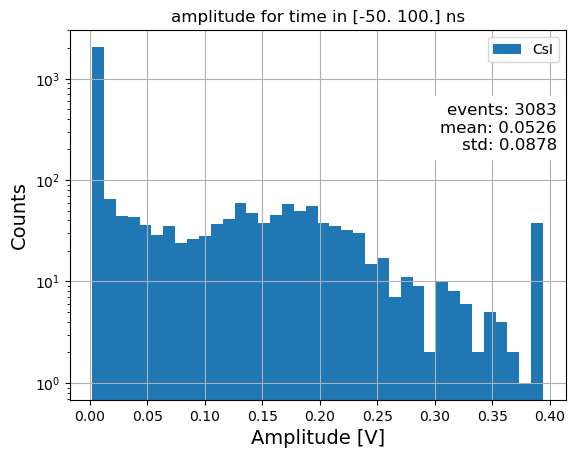

In [48]:
plt.hist(AMP, bins=38, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.yscale('log')
plt.show()

In [49]:
np.savetxt('data/CsI_elaborated_data/csi_center_trigger.txt', AMP)
#b = np.loadtxt('data/CsI_elaborated_data/csi_right_trigger.txt')

## csi triggered ext center bis

In [50]:
df = pd.read_csv('data/20230210/20230210_csi_thrext_150mV_dinuovocentro.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

In [51]:
df[['frame', 't1', 'a1', 'a2']]

,frame,t1,a1,a2
0,1.0,-0.000001,0.000,-0.006
1,1.0,-0.000001,0.000,-0.002
2,1.0,-0.000001,0.000,-0.002
3,1.0,-0.000001,0.000,-0.002
4,1.0,-0.000001,0.000,-0.002
...,...,...,...,...
2707595,967.0,0.000001,-0.008,0.006
2707596,967.0,0.000001,-0.010,0.006
2707597,967.0,0.000001,-0.008,0.002
2707598,967.0,0.000001,-0.010,0.006


Text(0, 0.5, 'Amplitude [mV]')

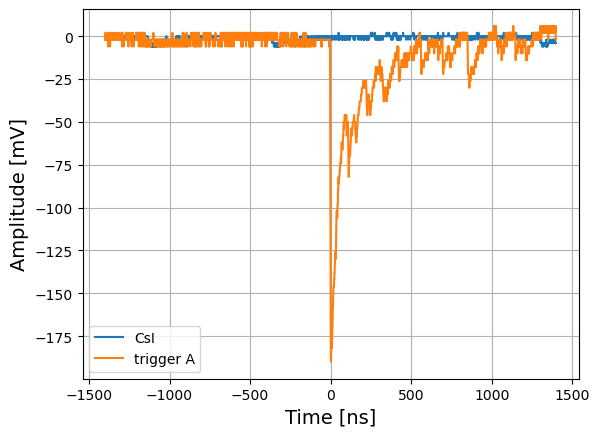

In [52]:
d=df.query('frame==16')
plt.plot(d.t1*1E9, d.a1*1000, label='CsI')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-1E2, 5E2)

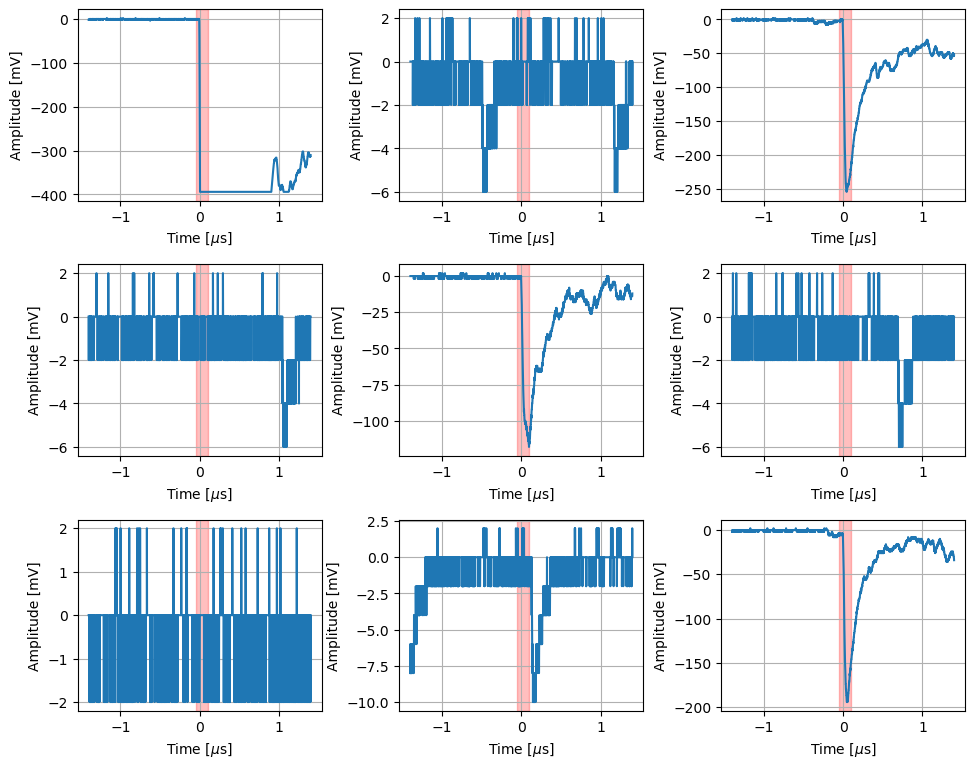

In [53]:
#%matplotlib widget
timerange=np.array([-50E-9, 100E-9])


i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [54]:
AMP = []
IND = []
timerange=np.array([-50E-9, 100E-9])
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)

C:\Users\Belle2\AppData\Local\Temp\ipykernel_17828\901430912.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


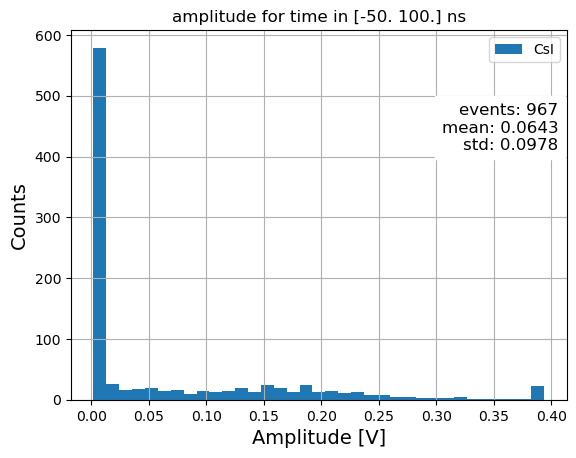

In [55]:
plt.hist(AMP, bins=35, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.show()

C:\Users\Belle2\AppData\Local\Temp\ipykernel_17828\360249793.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


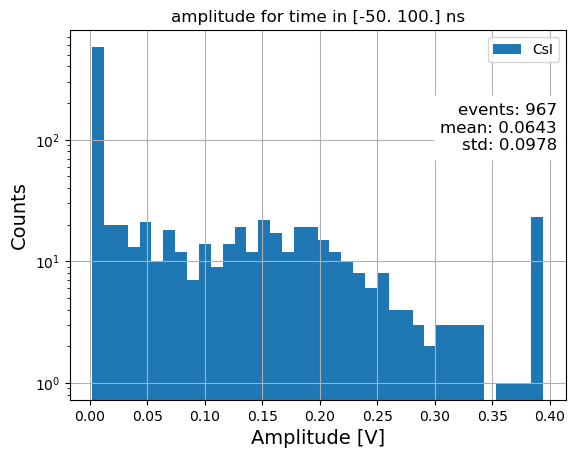

In [56]:
plt.hist(AMP, bins=38, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.yscale('log')
plt.show()

In [57]:
np.savetxt('data/CsI_elaborated_data/csi_centeragain_trigger.txt', AMP)
#b = np.loadtxt('data/CsI_elaborated_data/csi_right_trigger.txt')

In [58]:
right = np.loadtxt('data/CsI_elaborated_data/csi_right_trigger.txt')
center = np.loadtxt('data/CsI_elaborated_data/csi_center_trigger.txt')
centeragain = np.loadtxt('data/CsI_elaborated_data/csi_centeragain_trigger.txt')
left = np.loadtxt('data/CsI_elaborated_data/csi_left_trigger.txt')

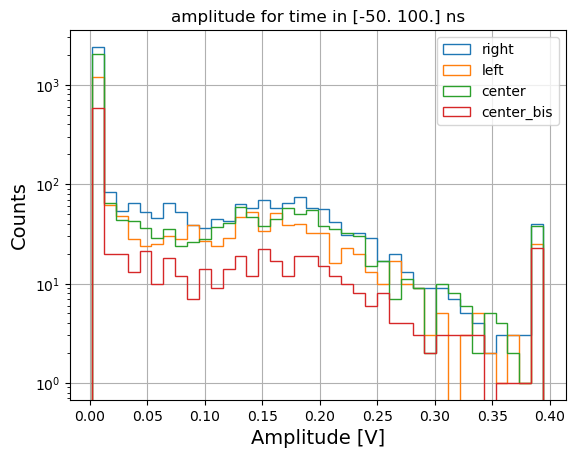

In [61]:
plt.hist(right, bins=38, label='right', histtype='step',)
plt.hist(left, bins=38, label='left', histtype='step',)
plt.hist(center, bins=38, label='center', histtype='step',)
plt.hist(centeragain, bins=38, label='center_bis', histtype='step',)

#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.yscale('log')
plt.show()

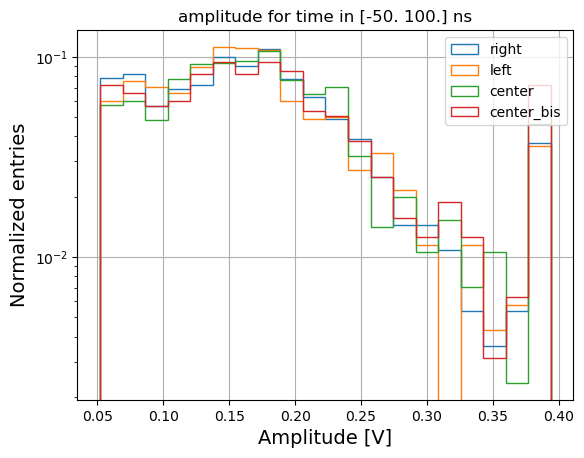

In [73]:
plt.hist(right[right>0.05], weights= np.ones_like(right[right>0.05])/len(right[right>0.05]), bins=20, label='right', histtype='step',)
plt.hist(left[left>0.05], weights= np.ones_like(left[left>0.05])/len(left[left>0.05]), bins=20, label='left', histtype='step',)
plt.hist(center[center>0.05], weights= np.ones_like(center[center>0.05])/len(center[center>0.05]), bins=20, label='center', histtype='step',)
plt.hist(centeragain[centeragain>0.05], weights= np.ones_like(centeragain[centeragain>0.05])/len(centeragain[centeragain>0.05]), bins=20, label='center_bis', histtype='step',)

#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Normalized entries', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.yscale('log')
plt.show()